In [1]:
import seaborn as sns
import torch

import pyro
import pyro.distributions as dist

from rethinking import MAP, precis

In [2]:
ways = torch.tensor([0., 3, 8, 9, 0])
ways / ways.sum()

tensor([0.0000, 0.1500, 0.4000, 0.4500, 0.0000])

In [3]:
dist.Binomial(total_count=9, probs=0.5).log_prob(torch.tensor(6.)).exp()

tensor(0.1641)

In [49]:
# define grid
p_grid = torch.linspace(start=0, end=1, steps=10)

# define prior
prior = torch.tensor(1.).repeat(10)
#prior = torch.where(p_grid < 0.5, torch.tensor(0.), torch.tensor(1.))
#prior = (-5 * (p_grid - 0.5).abs()).exp()
# compute likelihood at each value in grid
likelihood = dist.Binomial(total_count=9,
                           probs=p_grid).log_prob(torch.tensor(6.)).exp()

# compute product of likelihood and prior
unstd_posterior = likelihood * prior

# standardize the posterior, so it sums to 1
posterior = unstd_posterior / unstd_posterior.sum()

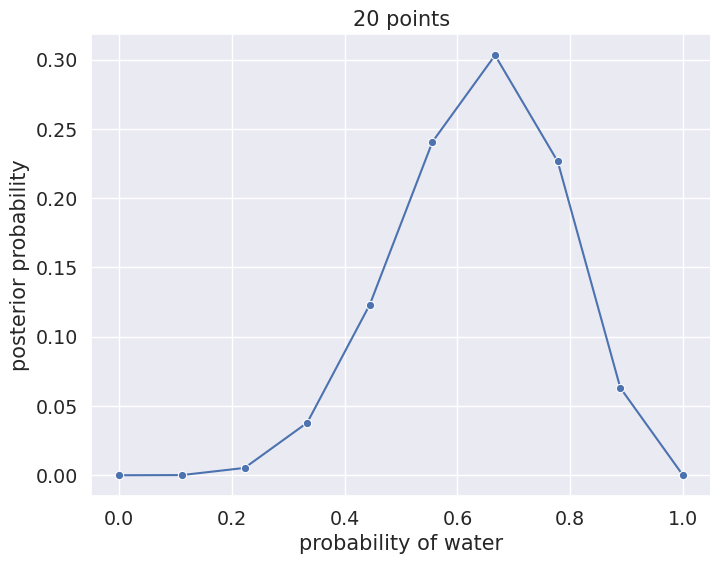

In [50]:
ax = sns.lineplot(p_grid, posterior, marker="o")
ax.set(xlabel="probability of water", ylabel="posterior probability",
       title="20 points");

In [6]:
prior = torch.where(p_grid < 0.5, torch.tensor(0.), torch.tensor(1.))
prior = (-5 * (p_grid - 0.5).abs()).exp()

In [56]:
def model(w):
    p = pyro.sample("p", dist.Uniform(0, 1))  # uniform prior
    pyro.sample("w", dist.Binomial(18, p), obs=w)  # binomial likelihood

globe_qa = MAP(model).run(torch.tensor(12.))

# display summary of quadratic approximation
precis(globe_qa)

,Mean,StdDev,|0.89,0.89|
p,0.35,0.1,0.18,0.51


In [82]:
import hvplot.pandas
import torcharrow
import pandas as pd
pd.options.plotting.backend = 'holoviews'
# analytical calculation
w = 10
n = 16
x = torch.linspace(0, 1, 101)
p_grid = torch.linspace(start=0, end=1, steps=105)
prior = torch.tensor(1.).repeat(10)
prior = torch.where(p_grid < 0.5, torch.tensor(0.), torch.tensor(1.))
d=prior*dist.Beta(w + 1, n - w + 1).log_prob(p_grid).exp()

pd.DataFrame(d.numpy()).plot()


#ax = sns.lineplot(x, dist.Beta(w + 1, n - w + 1).log_prob(x).exp())
#ax.set(xlabel="proportion water", ylabel="Density", title="n = 9")
## quadratic approximation
#precis_df = precis(globe_qa)
#sns.lineplot(x, dist.Normal(precis_df["Mean"].values[0],
#                            precis_df["StdDev"].values[0]).log_prob(x).exp())
#ax.lines[1].set_linestyle("--")

:Curve   [index]   (0)

In [55]:
precis_df

,Mean,StdDev,|0.89,0.89|
p,0.43,0.14,0.2,0.65
